<a href="https://www.kaggle.com/code/mlbysoham/fine-tuned-ensemble-learning-on-churn?scriptVersionId=158358756" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Package Import

In [1]:
!pip install imblearn

In [2]:
import imblearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Wrangling

In [3]:
churn = pd.read_csv(r'/kaggle/input/playground-series-s4e1/train.csv')
churn_original = pd.read_csv(r'/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')
churn

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [4]:
churn_original = churn_original.rename(columns = {"RowNumber": "id"})
churn_original

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
churn = pd.concat([churn, churn_original])
churn = churn.reset_index(drop=True)

# Data Cleaning

In [6]:
churn.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
for i in churn.columns:
    print(i,':',sum(churn[i]==np.nan))

id : 0
CustomerId : 0
Surname : 0
CreditScore : 0
Geography : 0
Gender : 0
Age : 0
Tenure : 0
Balance : 0
NumOfProducts : 0
HasCrCard : 0
IsActiveMember : 0
EstimatedSalary : 0
Exited : 0


In [8]:
for i in churn.columns:
    print(i,':',sum(churn[i]=='NaN'))

id : 0
CustomerId : 0
Surname : 0
CreditScore : 0
Geography : 0
Gender : 0
Age : 0
Tenure : 0
Balance : 0
NumOfProducts : 0
HasCrCard : 0
IsActiveMember : 0
EstimatedSalary : 0
Exited : 0


In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175034 entries, 0 to 175033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               175034 non-null  int64  
 1   CustomerId       175034 non-null  int64  
 2   Surname          175034 non-null  object 
 3   CreditScore      175034 non-null  int64  
 4   Geography        175034 non-null  object 
 5   Gender           175034 non-null  object 
 6   Age              175034 non-null  float64
 7   Tenure           175034 non-null  int64  
 8   Balance          175034 non-null  float64
 9   NumOfProducts    175034 non-null  int64  
 10  HasCrCard        175034 non-null  float64
 11  IsActiveMember   175034 non-null  float64
 12  EstimatedSalary  175034 non-null  float64
 13  Exited           175034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 18.7+ MB


In [10]:
churn.describe(include='all')

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,175034.000000,1.750340e+05,175034,175034.000000,175034,175034,175034.000000,175034.000000,175034.000000,175034.00000,175034.000000,175034.00000,175034.000000,175034.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Hsia,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2474,NaN,99229,98607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,78087.874704,1.569194e+07,NaN,656.115835,NaN,NaN,38.171360,5.019922,56678.299368,1.55307,0.751185,0.49876,111861.556577,0.211148
std,49640.515418,7.142890e+04,NaN,81.151171,NaN,NaN,8.969552,2.811136,62982.565768,0.54921,0.432327,0.50000,50815.382991,0.408124
min,0.000000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.00000,0.000000,0.00000,11.580000,0.000000
25%,33758.250000,1.563288e+07,NaN,597.000000,NaN,NaN,32.000000,3.000000,0.000000,1.00000,1.000000,0.00000,73192.370000,0.000000
50%,77516.500000,1.569017e+07,NaN,659.000000,NaN,NaN,37.000000,5.000000,0.000000,2.00000,1.000000,0.00000,116969.730000,0.000000
75%,121274.750000,1.575666e+07,NaN,710.000000,NaN,NaN,42.000000,7.000000,120729.297500,2.00000,1.000000,1.00000,154767.340000,0.000000


In [11]:
churn = churn.drop(['Surname','CustomerId','id'],axis=1)
churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
175029,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
175030,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
175031,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
175032,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


In [12]:
Q1 = np.percentile(churn.Balance, 25)
Q3 = np.percentile(churn.Balance, 75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR  

upper_outliers = churn.Balance[churn.Balance > upper_bound]

print(f"Upper Bound for Outliers: {upper_bound}")
print(f"Upper Outliers: {upper_outliers}")

Upper Bound for Outliers: 301823.24375
Upper Outliers: Series([], Name: Balance, dtype: float64)


In [13]:
Q1 = np.percentile(churn.CreditScore, 25)
Q3 = np.percentile(churn.CreditScore, 75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR  

upper_outliers = churn.CreditScore[churn.CreditScore > upper_bound]

print(f"Upper Bound for Outliers: {upper_bound}")
print(f"Upper Outliers: {upper_outliers}")

Upper Bound for Outliers: 879.5
Upper Outliers: Series([], Name: CreditScore, dtype: int64)


In [14]:
Q1 = np.percentile(churn.EstimatedSalary, 25)
Q3 = np.percentile(churn.EstimatedSalary, 75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR  

upper_outliers = churn.EstimatedSalary[churn.EstimatedSalary > upper_bound]

print(f"Upper Bound for Outliers: {upper_bound}")
print(f"Upper Outliers: {upper_outliers}")

Upper Bound for Outliers: 277129.795
Upper Outliers: Series([], Name: EstimatedSalary, dtype: float64)


In [15]:
Q1 = np.percentile(churn.Age, 25)
Q3 = np.percentile(churn.Age, 75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR  

upper_outliers = churn.Age[churn.Age > upper_bound]

print(f"Upper Bound for Outliers: {upper_bound}")
print(f"Upper Outliers: {upper_outliers}")

Upper Bound for Outliers: 57.0
Upper Outliers: 12        71.0
19        61.0
27        58.0
39        58.0
84        64.0
          ... 
174928    77.0
174931    61.0
174943    58.0
174970    77.0
175013    58.0
Name: Age, Length: 7049, dtype: float64


In [16]:
Q1 = np.percentile(churn.EstimatedSalary, 25)
Q3 = np.percentile(churn.EstimatedSalary, 75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR  

upper_outliers = churn.EstimatedSalary[churn.EstimatedSalary > upper_bound]

print(f"Upper Bound for Outliers: {upper_bound}")
print(f"Upper Outliers: {upper_outliers}")

Upper Bound for Outliers: 277129.795
Upper Outliers: Series([], Name: EstimatedSalary, dtype: float64)


In [17]:
from scipy.stats import zscore

In [18]:
z_scores = zscore(churn['Balance'])

threshold = 3

upper_outliers_zscore = churn['Balance'][z_scores > threshold]

print(f"Z-scores: {z_scores}")
print(f"Upper Outliers based on Z-score: {upper_outliers_zscore}")

Z-scores: 0        -0.899907
1        -0.899907
2        -0.899907
3         1.463969
4        -0.899907
            ...   
175029   -0.899907
175030    0.010976
175031   -0.899907
175032    0.292098
175033    1.166429
Name: Balance, Length: 175034, dtype: float64
Upper Outliers based on Z-score: 12268     250898.09
87098     250898.09
91731     250898.09
167126    250898.09
Name: Balance, dtype: float64


In [19]:
z_scores = zscore(churn['Balance'])

threshold = 3

upper_outliers_zscore = churn['Balance'][z_scores > threshold]

median_balance = churn['Balance'].median()  
churn['Balance'][z_scores > threshold] = median_balance

print(churn['Balance'])

0              0.00
1              0.00
2              0.00
3         148882.54
4              0.00
            ...    
175029         0.00
175030     57369.61
175031         0.00
175032     75075.31
175033    130142.79
Name: Balance, Length: 175034, dtype: float64


/tmp/ipykernel_19/973054449.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['Balance'][z_scores > threshold] = median_balance


In [20]:
z_scores = zscore(churn['CreditScore'])

threshold = 3

upper_outliers_zscore = churn['CreditScore'][z_scores > threshold]

print(f"Z-scores: {z_scores}")
print(f"Upper Outliers based on Z-score: {upper_outliers_zscore}")

Z-scores: 0         0.146445
1        -0.358786
2         0.269672
3        -0.925631
4         0.737936
            ...   
175029    1.415685
175030   -1.726608
175031    0.651677
175032    1.428008
175033    1.674462
Name: CreditScore, Length: 175034, dtype: float64
Upper Outliers based on Z-score: Series([], Name: CreditScore, dtype: int64)


In [21]:
z_scores = zscore(churn['EstimatedSalary'])

threshold = 3

upper_outliers_zscore = churn['EstimatedSalary'][z_scores > threshold]

print(f"Z-scores: {z_scores}")
print(f"Upper Outliers based on Z-score: {upper_outliers_zscore}")

Z-scores: 0         1.369440
1        -1.227153
2         1.436678
3        -0.537254
4        -1.904797
            ...   
175029   -0.306816
175030   -0.199975
175031   -1.373131
175032   -0.373373
175033   -1.449777
Name: EstimatedSalary, Length: 175034, dtype: float64
Upper Outliers based on Z-score: Series([], Name: EstimatedSalary, dtype: float64)


In [22]:
while True:
    z_scores = zscore(churn['Age'])
    threshold = 3
    upper_outliers_zscore = churn['Age'][z_scores > threshold]

    if upper_outliers_zscore.empty:
        break  
    
    median_age = churn['Age'].median()  
    churn['Age'][z_scores > threshold] = median_age

print(churn['Age'])

0         33.0
1         33.0
2         40.0
3         34.0
4         33.0
          ... 
175029    39.0
175030    35.0
175031    36.0
175032    42.0
175033    28.0
Name: Age, Length: 175034, dtype: float64


/tmp/ipykernel_19/4108449585.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['Age'][z_scores > threshold] = median_age
/tmp/ipykernel_19/4108449585.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['Age'][z_scores > threshold] = median_age
/tmp/ipykernel_19/4108449585.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['Age'][z_scores > threshold] = median_age


In [23]:
z_scores = zscore(churn['Age'])

threshold = 3

upper_outliers_zscore = churn['Age'][z_scores > threshold]

print(f"Z-scores: {z_scores}")
print(f"Upper Outliers based on Z-score: {upper_outliers_zscore}")

Z-scores: 0        -0.575779
1        -0.575779
2         0.315814
3        -0.448409
4        -0.575779
            ...   
175029    0.188443
175030   -0.321038
175031   -0.193668
175032    0.570554
175033   -1.212631
Name: Age, Length: 175034, dtype: float64
Upper Outliers based on Z-score: Series([], Name: Age, dtype: float64)


We found that there were outlier only in the 'Balance' and 'Age' attribute, on the basis of the z-scores. Those outliers were removed by the median of the data. Rest columns were fine.

# Data Analysis

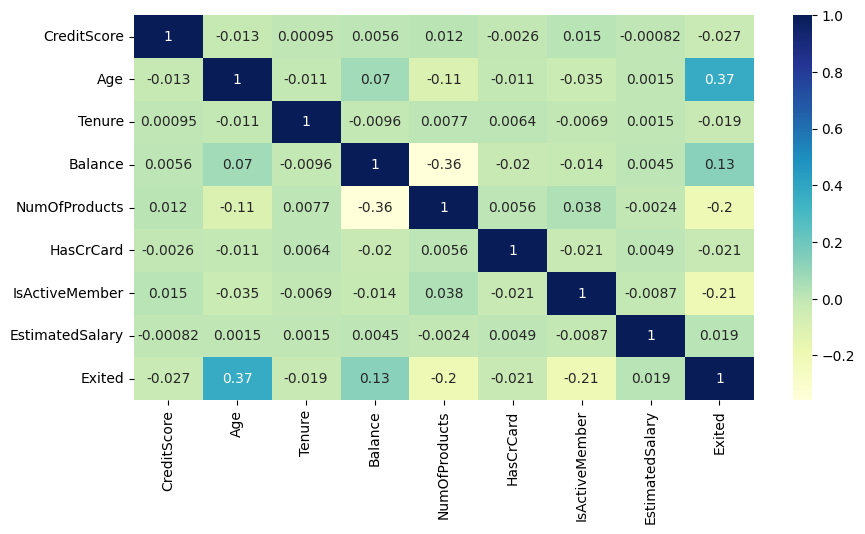

In [24]:
#heatmap
num_churn = churn.drop(['Geography','Gender'],axis=1)

plt.figure(figsize=(10,5))
cor=num_churn.corr()
sns.heatmap(cor,annot=True,cmap='YlGnBu')
plt.show()

/tmp/ipykernel_19/2341028129.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.CreditScore[churn.Exited==1])
/tmp/ipykernel_19/2341028129.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.CreditScore[churn.Exited==0])


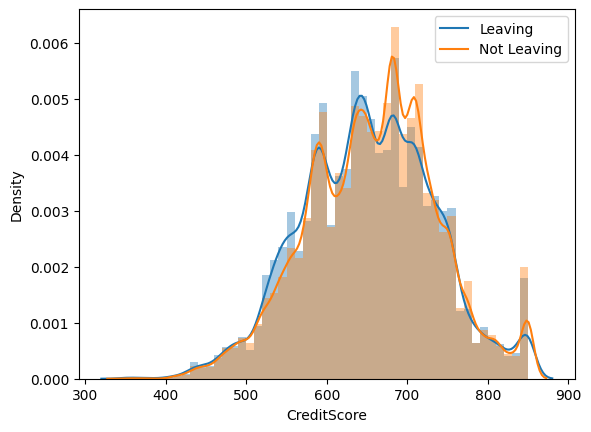

In [25]:
#analysis between CreditScore and Exited

sns.distplot(churn.CreditScore[churn.Exited==1])
sns.distplot(churn.CreditScore[churn.Exited==0])
plt.legend(['Leaving','Not Leaving'])
plt.show()

#CreditScore relation shows that people both leave and stay at each point

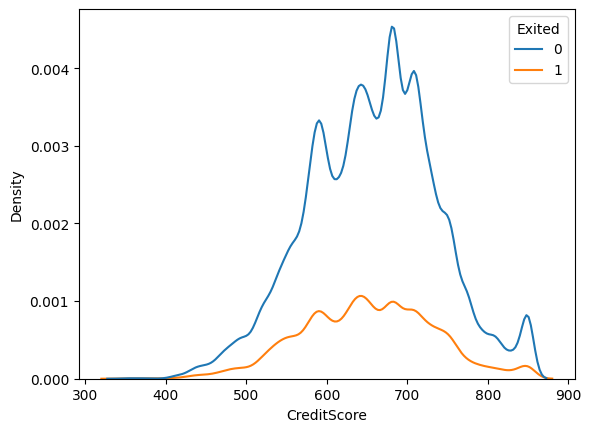

In [26]:
sns.kdeplot(x=churn.CreditScore,hue=churn.Exited)
plt.show()

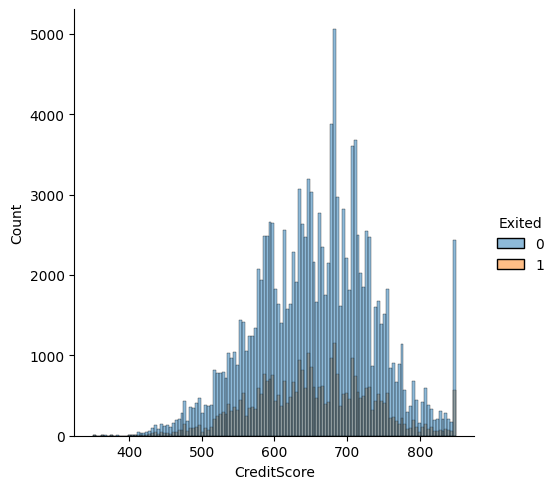

In [27]:
sns.displot(x=churn.CreditScore,hue=churn.Exited)
plt.show()

#data of persons leaving the bank is less, thus density of '1' is less

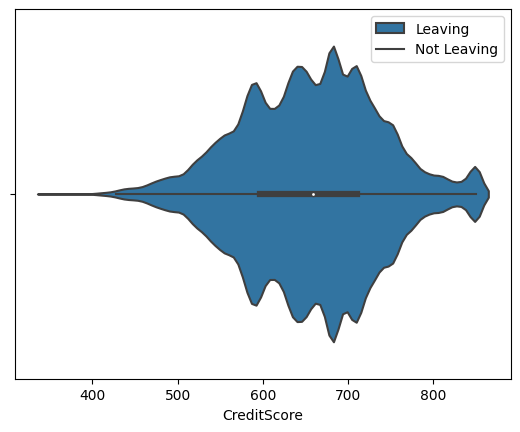

In [28]:
sns.violinplot(x=churn.CreditScore,hue=churn.Exited,data=churn)
plt.legend(['Leaving','Not Leaving'])
plt.show()

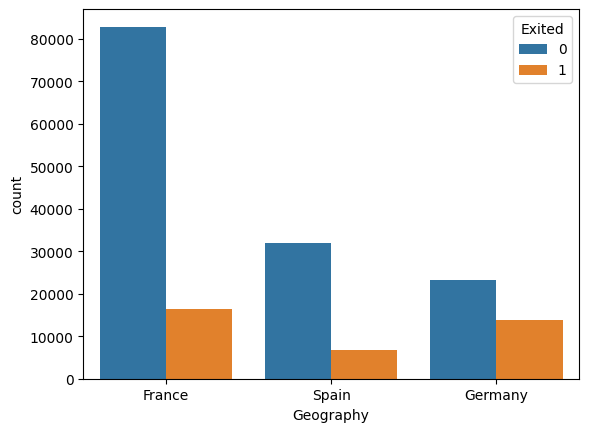

In [29]:
#analysis between geography and exited

sns.countplot(x=churn.Geography,hue=churn.Exited)
plt.show()

#the data from Geography affects the Exited, as more people from 'France' are leaving the bank

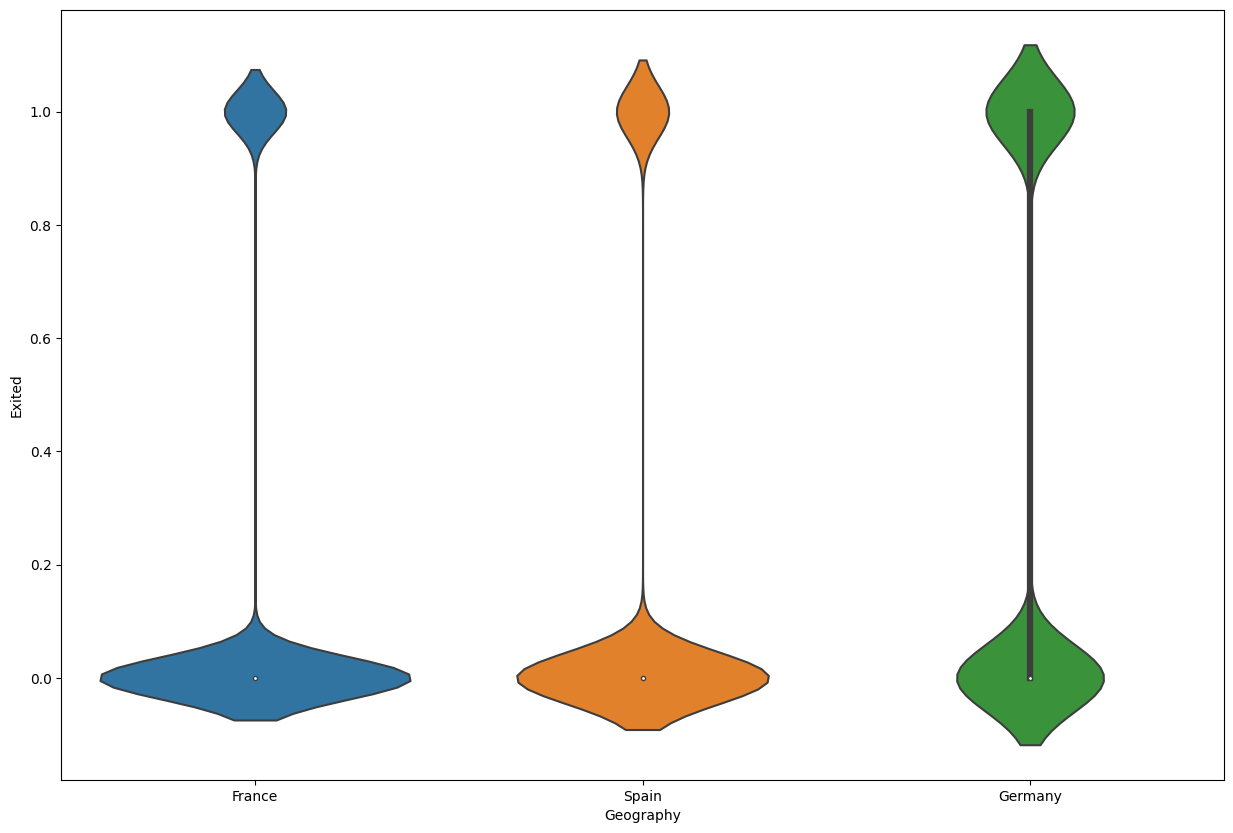

In [30]:
plt.figure(figsize=(15,10))
sns.violinplot(x=churn.Geography,y=churn.Exited)     #not possible for categorcial
plt.show()

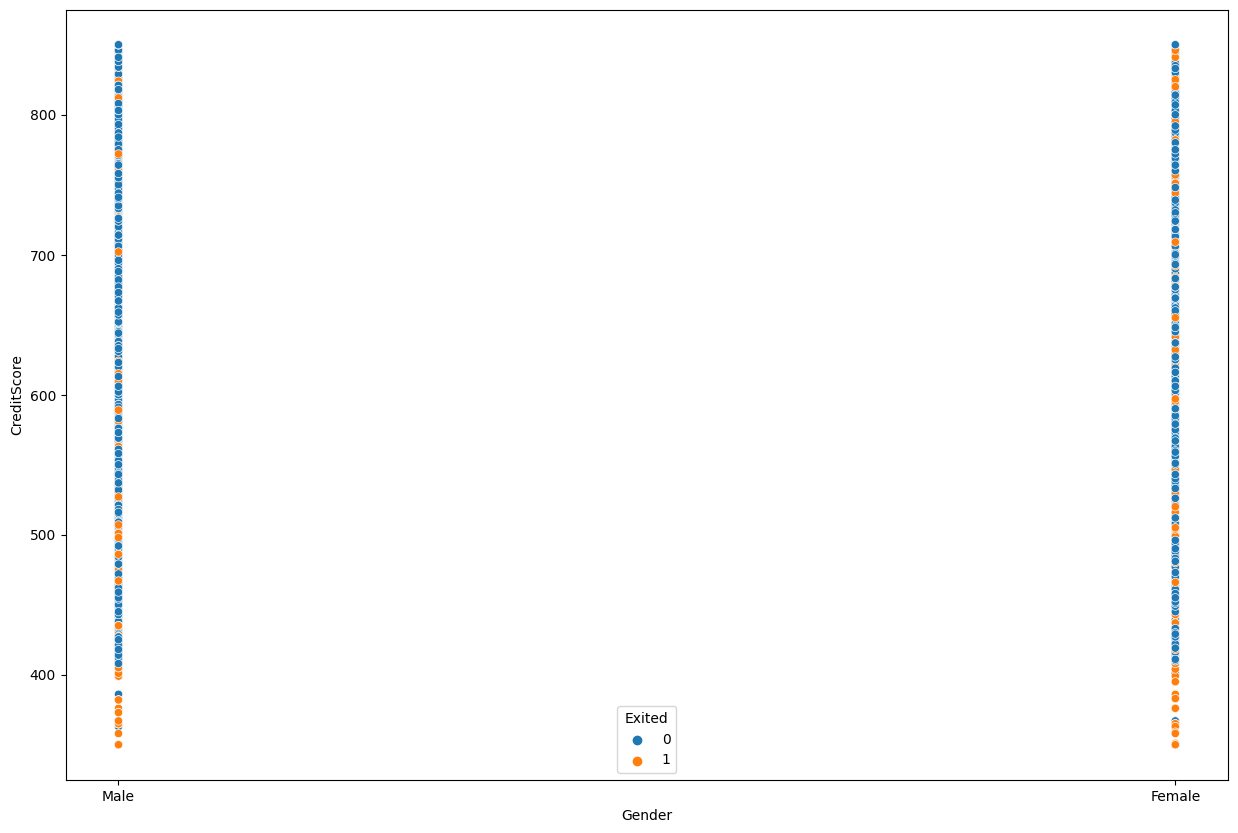

In [31]:
#analysis between gender and exited

plt.figure(figsize=(15,10))
sns.scatterplot(x=churn.Gender,y=churn.CreditScore,hue=churn.Exited)
plt.show()

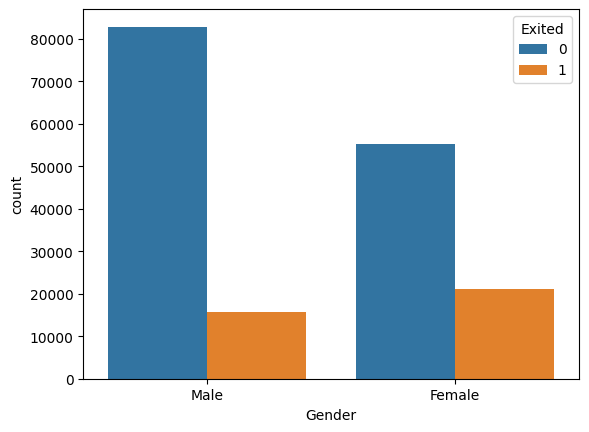

In [32]:
sns.countplot(x=churn.Gender,hue=churn.Exited)
plt.show()

#the data from Gender affects the Exited, as more 'male' people are leaving the bank

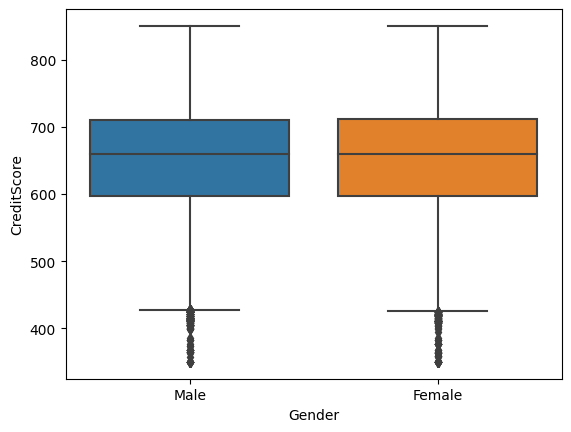

In [33]:
sns.boxplot(x=churn.Gender,y=churn.CreditScore)
plt.show()

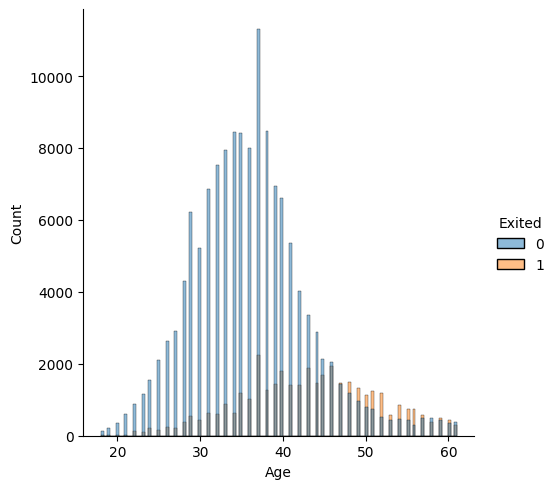

In [34]:
#analysis between age and exited

sns.displot(x=churn.Age,hue=churn.Exited)
plt.show()

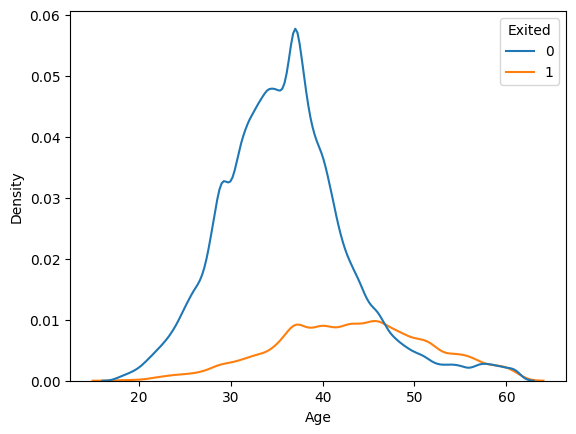

In [35]:
sns.kdeplot(x=churn.Age,hue=churn.Exited)
plt.show()

#less age people are leaving the bank

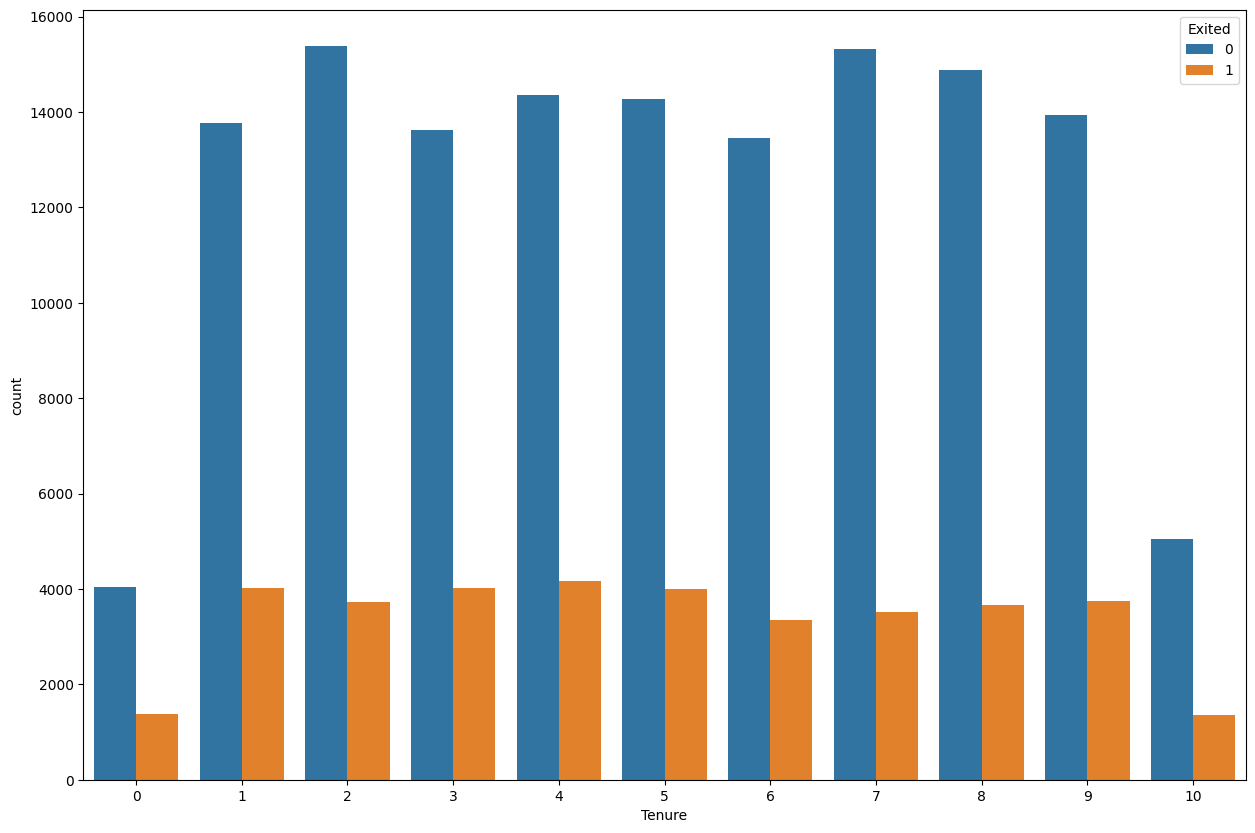

In [36]:
#analysis between tenure and exited

plt.figure(figsize=(15,10))
sns.countplot(x=churn.Tenure,hue=churn.Exited)
plt.show()

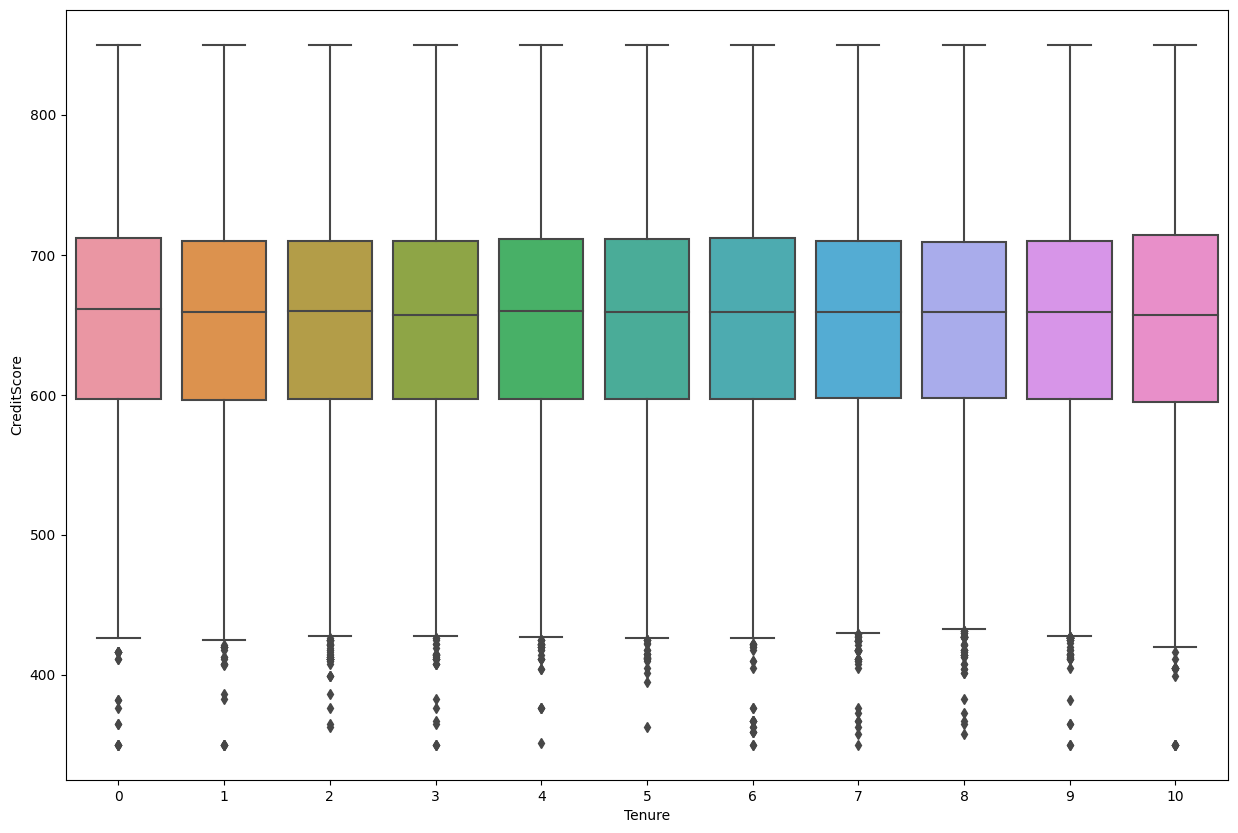

In [37]:
plt.figure(figsize=(15,10))
sns.boxplot(x=churn.Tenure,y=churn.CreditScore)
plt.show()

/tmp/ipykernel_19/3981106518.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.Tenure[churn.Exited==1])
/tmp/ipykernel_19/3981106518.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.Tenure[churn.Exited==0])


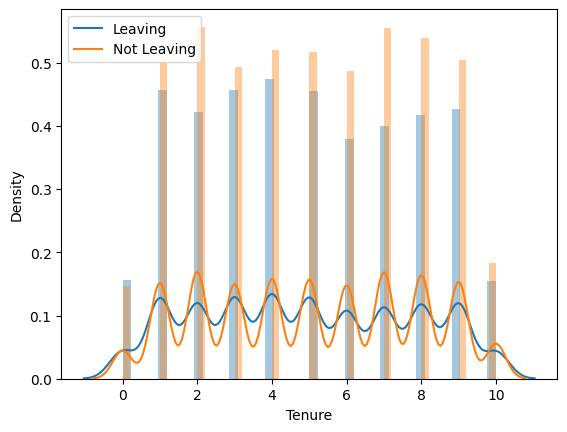

In [38]:
sns.distplot(churn.Tenure[churn.Exited==1])
sns.distplot(churn.Tenure[churn.Exited==0])
plt.legend(['Leaving','Not Leaving'])
plt.show()

#slight overlap can be seen, thus can be dropped in future to improve accuracy

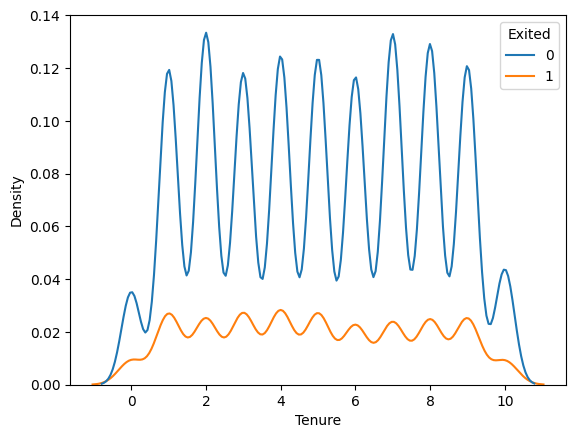

In [39]:
sns.kdeplot(x=churn.Tenure,hue=churn.Exited)
plt.show()

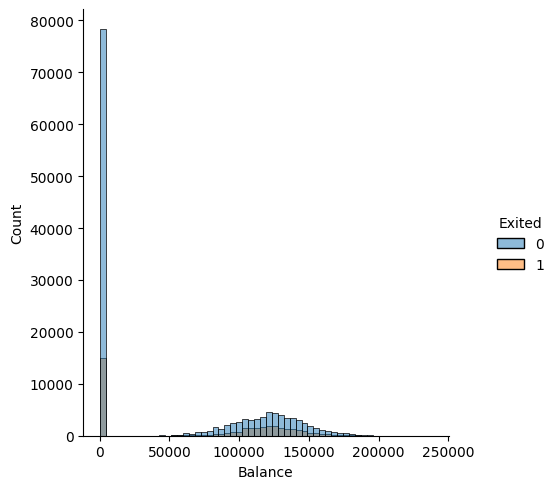

In [40]:
#analysis between balance and exited

sns.displot(x=churn.Balance,hue=churn.Exited)
plt.show()

/tmp/ipykernel_19/3530409707.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.Balance[churn.Exited==1])
/tmp/ipykernel_19/3530409707.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.Balance[churn.Exited==0])


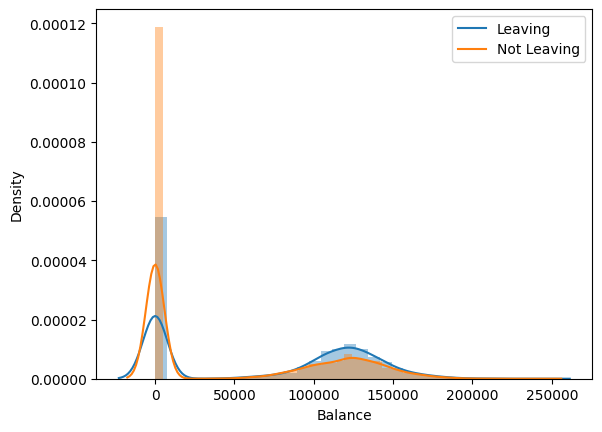

In [41]:
sns.distplot(churn.Balance[churn.Exited==1])
sns.distplot(churn.Balance[churn.Exited==0])
plt.legend(['Leaving','Not Leaving'])
plt.show()

#the data is non-overlapping, thus affecting

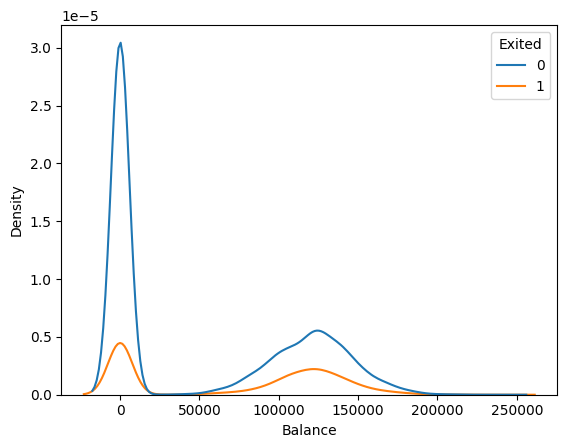

In [42]:
sns.kdeplot(x=churn.Balance,hue=churn.Exited)
plt.show()

/tmp/ipykernel_19/246948588.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.NumOfProducts[churn.Exited==1])
/tmp/ipykernel_19/246948588.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.NumOfProducts[churn.Exited==0])


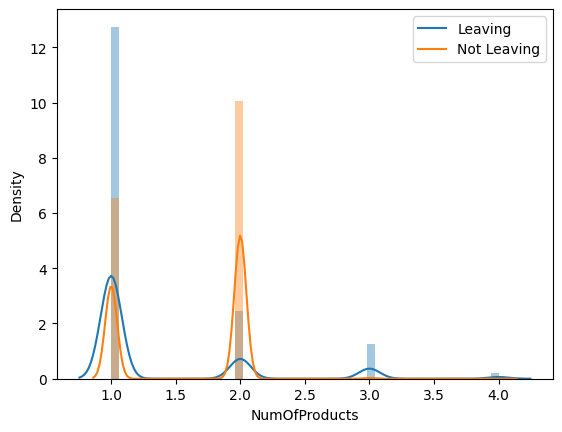

In [43]:
sns.distplot(churn.NumOfProducts[churn.Exited==1])
sns.distplot(churn.NumOfProducts[churn.Exited==0])
plt.legend(['Leaving','Not Leaving'])
plt.show()

#non-overlapping, thus shows that variation

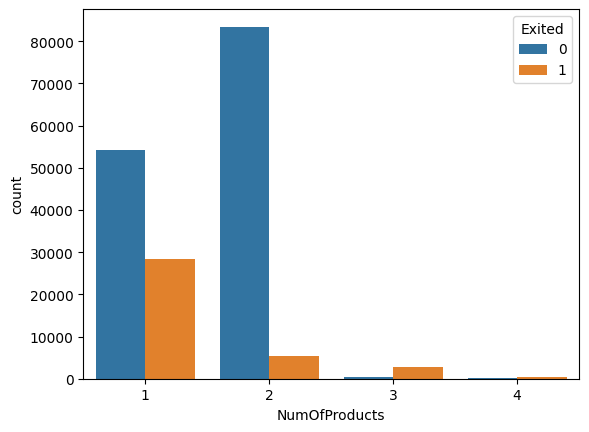

In [44]:
#analysis between NumOfProducts and Exited

sns.countplot(x=churn.NumOfProducts,hue=churn.Exited)
plt.show()

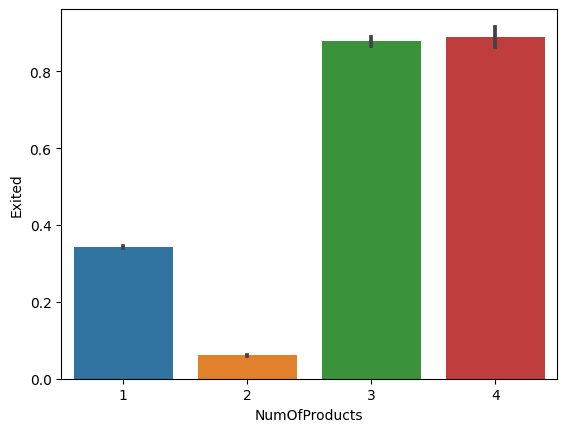

In [45]:
sns.barplot(x=churn.NumOfProducts,y=churn.Exited)
plt.show()


/tmp/ipykernel_19/3355940717.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.HasCrCard[churn.Exited==1])
/tmp/ipykernel_19/3355940717.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.HasCrCard[churn.Exited==0])


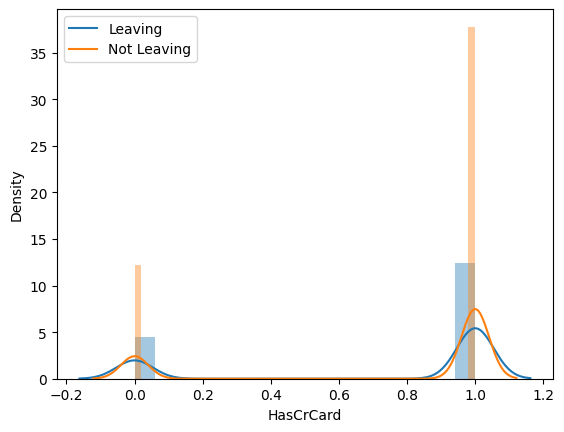

In [46]:
sns.distplot(churn.HasCrCard[churn.Exited==1])
sns.distplot(churn.HasCrCard[churn.Exited==0])
plt.legend(['Leaving','Not Leaving'])
plt.show()

#non-overlapping

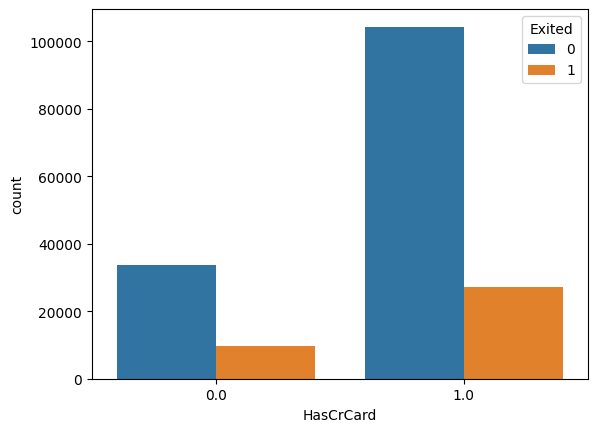

In [47]:
#analysis between hascrcard and exited

sns.countplot(x=churn.HasCrCard,hue=churn.Exited)
plt.show()

#non-overlapping, thus affecting the output

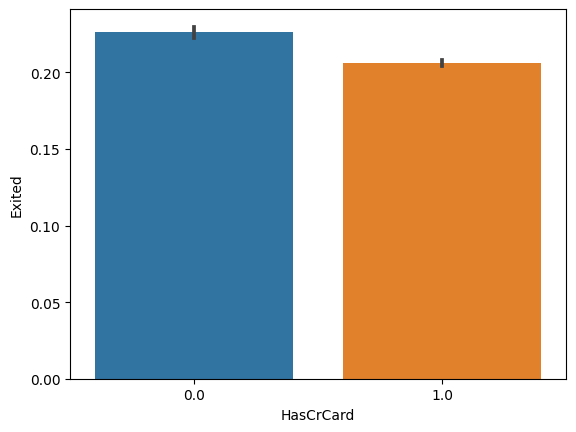

In [48]:
sns.barplot(x=churn.HasCrCard,y=churn.Exited)
plt.show()

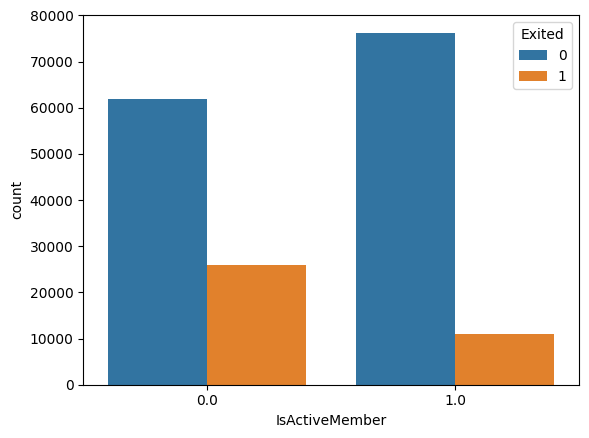

In [49]:
#analysis between isactivemember and exited

sns.countplot(x=churn.IsActiveMember,hue=churn.Exited)
plt.show()

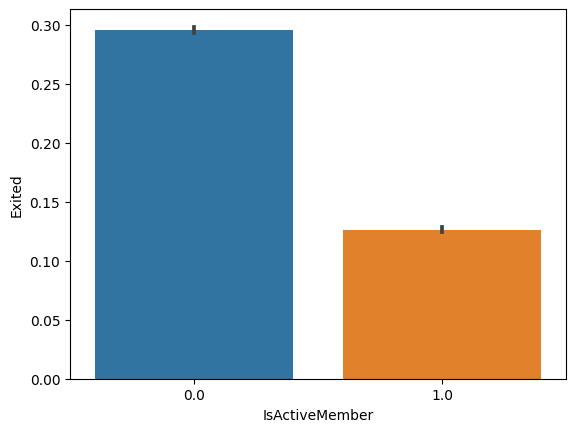

In [50]:
sns.barplot(x=churn.IsActiveMember,y=churn.Exited)
plt.show()

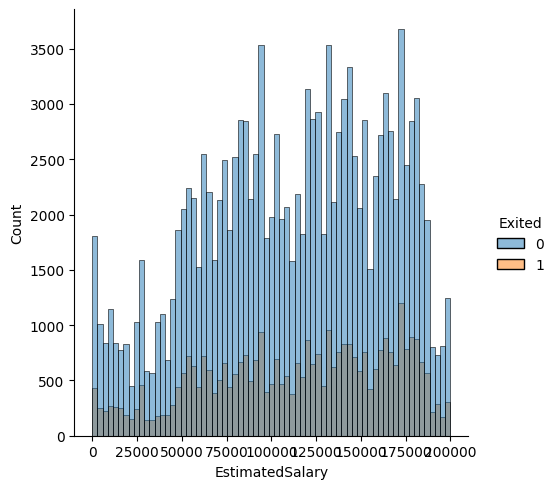

In [51]:
#analysis between estimatedsalary and exited

sns.displot(x=churn.EstimatedSalary,hue=churn.Exited)
plt.show()

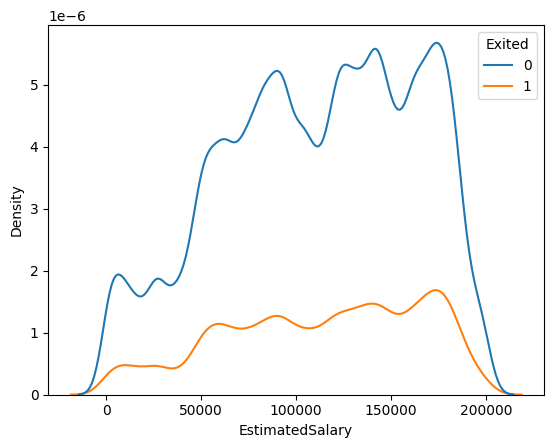

In [52]:
sns.kdeplot(x=churn.EstimatedSalary,hue=churn.Exited)
plt.show()


/tmp/ipykernel_19/1127099885.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.EstimatedSalary[churn.Exited==1])
/tmp/ipykernel_19/1127099885.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.EstimatedSalary[churn.Exited==0])


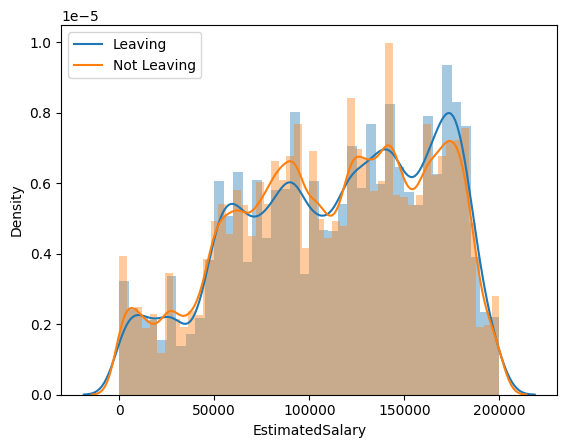

In [53]:
sns.distplot(churn.EstimatedSalary[churn.Exited==1])
sns.distplot(churn.EstimatedSalary[churn.Exited==0])
plt.legend(['Leaving','Not Leaving'])
plt.show()

#sligth overlap, thus can be dropped in future to improve accuracy

# Label Encoding

In [54]:
churn.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [55]:
churn.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [56]:
country_map = {'France': 0, 'Spain': 1, 'Germany': 2}

churn['Geography'] = churn['Geography'].map(country_map)

print(churn['Geography'].unique())

[0 1 2]


In [57]:
gender_map = {'Male': 0, 'Female': 1}

churn['Gender'] = churn['Gender'].map(gender_map)

print(churn['Gender'].unique())

[0 1]


In [58]:
churn.Gender.unique()

array([0, 1])

In [59]:
churn.Geography.unique()

array([0, 1, 2])

# Ip/Op creation

In [60]:
ip=churn.drop('Exited',axis=1)
op=churn.Exited

<Axes: ylabel='Frequency'>

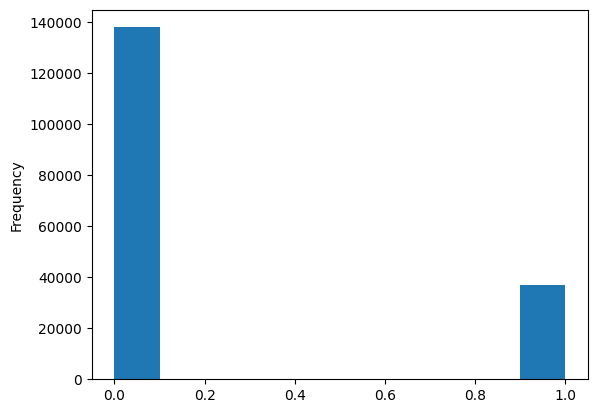

In [61]:
op.plot(kind = 'hist')

In [62]:
ip.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

# Under Sampling
Under Sampling can be defined as removing some observations of the majority class. This is done until the majority and the minority class is balanced out.
Under sampling can be a good choice when you have a ton of data-think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.
In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.
A drawback to consider when under-sampling is that it can cause over-fitting and poor generalization to your test set.

## Random Under Sampling

In [63]:
from imblearn.under_sampling import RandomUnderSampler

#importing the 'RandomUnderSampler' library from 'imblearn' package

In [64]:
rus = RandomUnderSampler(random_state=105)

In [65]:
X_rus, y_rus = rus.fit_resample(ip,op)

In [66]:
X_rus.shape, y_rus.shape, ip.shape, op.shape

((73916, 10), (73916,), (175034, 10), (175034,))

In [67]:
op.value_counts()

Exited
0    138076
1     36958
Name: count, dtype: int64

In [68]:
y_rus.value_counts()

#we can see that both the data for the 'exited' and not 'exited' are same.
#The 'not exited/0' has been reduced to the size of 'exited/1'

#the rows of the larger category are dropped to match that of the smaller one

Exited
0    36958
1    36958
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

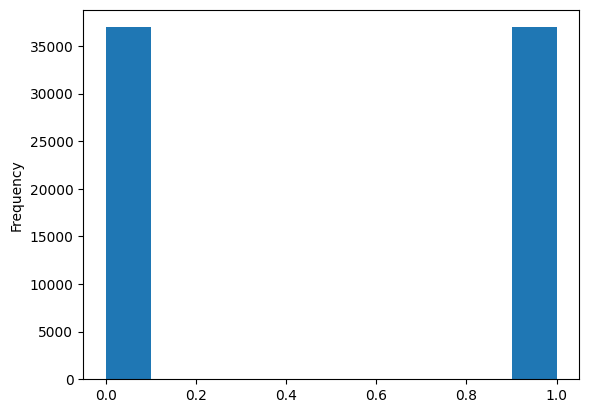

In [69]:
y_rus.plot(kind = 'hist')

### Split Random Under Sampled Data

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
xtr_rus, xts_rus, ytr_rus, yts_rus = train_test_split(X_rus,y_rus,test_size=0.25,random_state=25)

### Standardize Random Under Sampled Data


In [72]:
xtr_rus.size

554370

In [73]:
xts_rus.shape

(18479, 10)

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [75]:
xtr_rus = sc.fit_transform(xtr_rus)

In [76]:
xts_rus = sc.fit_transform(xts_rus)

### Model Pipeline

In [77]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from lightgbm import LGBMClassifier

In [78]:
# Creating pipelines for different classifiers
pipelines = {
    'KNN': Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]),
    'LightGBM': LGBMClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SGD': Pipeline([('scaler', StandardScaler()), ('sgd', SGDClassifier())]),
    'Gaussian NB': GaussianNB()
}

# Training and evaluating models
for name, pipe in pipelines.items():
    if name not in ['Random Forest', 'Gaussian NB', 'LightGBM']:  # These models don't require scaling
        pipe.fit(xtr_rus, ytr_rus)
    else:
        pipe.fit(xtr_rus, ytr_rus)

    # Predict
    y_pred = pipe.predict(xts_rus)

    # Calculate accuracy
    accuracy = accuracy_score(yts_rus, y_pred)
    print(f'{name} - Accuracy: {accuracy:.4f}')

    #print classification report
    print(f'{name} - Report:')
    print(classification_report(yts_rus, y_pred))


KNN - Accuracy: 0.7715
KNN - Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      9237
           1       0.77      0.77      0.77      9242

    accuracy                           0.77     18479
   macro avg       0.77      0.77      0.77     18479
weighted avg       0.77      0.77      0.77     18479

LightGBM - Accuracy: 0.8035
LightGBM - Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      9237
           1       0.81      0.80      0.80      9242

    accuracy                           0.80     18479
   macro avg       0.80      0.80      0.80     18479
weighted avg       0.80      0.80      0.80     18479

Random Forest - Accuracy: 0.7900
Random Forest - Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      9237
           1       0.79      0.79      0.79      9242

    accuracy                           0.

The under-sampling as expected didn't yeild good results as the quantity of data was reduced considerably.

# Over Sampling
Over Sampling can be defined as adding more copies to the minority class. Over-sampling can be a good choice, when you don't have a ton of data to work with.
The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause over-fitting.

## Random Over Sampling

In [79]:
from imblearn.over_sampling import RandomOverSampler

In [80]:
ros = RandomOverSampler(random_state=107)

In [81]:
X_ros , y_ros = ros.fit_resample(ip,op)

In [82]:
X_ros.shape, y_ros.shape, ip.shape, op.shape

((276152, 10), (276152,), (175034, 10), (175034,))

In [83]:
y_ros.value_counts()

Exited
0    138076
1    138076
Name: count, dtype: int64

In [84]:
op.value_counts()

Exited
0    138076
1     36958
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

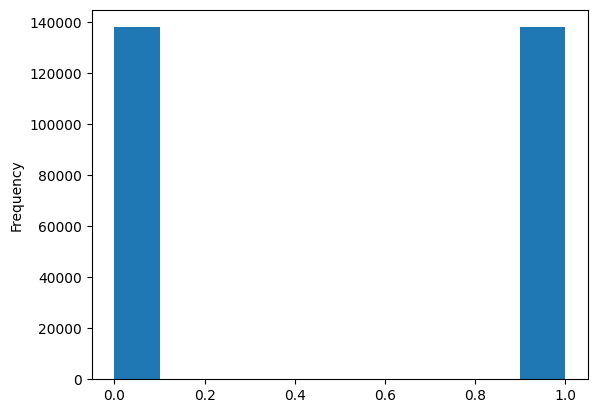

In [85]:
y_ros.plot(kind = 'hist')

#we can see that both the data for the 'exited' and 'not exited' are same.
#The 'exited/1' has been increased to the size of 'not exited/0'

#the rows of the smaller category is randomly assigned values, so as to match that of the larger one
#the benefit of 'random over sampling' is that we do not lose any of the original data from the dataset

### Split Random Over Sampled Data

In [86]:
xtr_ros, xts_ros, ytr_ros, yts_ros = train_test_split(X_ros,y_ros,test_size=0.25,random_state=25)

### Standardize Random Over Sampled Data


In [87]:
xtr_ros = sc.fit_transform(xtr_ros)

In [88]:
xts_ros = sc.fit_transform(xts_ros)

### Model Pipeline

In [89]:
# Creating pipelines for different classifiers
pipelines = {
    'KNN': Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]),
    'LightGBM': LGBMClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SGD': Pipeline([('scaler', StandardScaler()), ('sgd', SGDClassifier())]),
    'Gaussian NB': GaussianNB()
}

# Training and evaluating models
for name, pipe in pipelines.items():
    if name not in ['Random Forest', 'Gaussian NB', 'LightGBM']:  # These models don't require scaling
        pipe.fit(xtr_ros, ytr_ros)
    else:
        pipe.fit(xtr_ros, ytr_ros)

    # Predict
    y_pred = pipe.predict(xts_ros)

    # Calculate accuracy
    accuracy = accuracy_score(yts_ros, y_pred)
    print(f'{name} - Accuracy: {accuracy:.4f}')

    #print classification report
    print(f'{name} - Report:')
    print(classification_report(yts_ros, y_pred))


KNN - Accuracy: 0.8268
KNN - Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82     34452
           1       0.79      0.89      0.84     34586

    accuracy                           0.83     69038
   macro avg       0.83      0.83      0.83     69038
weighted avg       0.83      0.83      0.83     69038

LightGBM - Accuracy: 0.8079
LightGBM - Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     34452
           1       0.82      0.79      0.81     34586

    accuracy                           0.81     69038
   macro avg       0.81      0.81      0.81     69038
weighted avg       0.81      0.81      0.81     69038

Random Forest - Accuracy: 0.9354
Random Forest - Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     34452
           1       0.90      0.98      0.94     34586

    accuracy                           0.

Random Forest yeilds the most accuracy. Thus, further modifications are to be done on this particular model. But, it was found to under-perform in the test set, so the other two models KNN and LightGBM are also considered.

# Fine-Tuning Random Forest Classifier Model

In [90]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [91]:
rf_classifier = RandomForestClassifier()

# Define the hyperparameters grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10],   # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(xtr_ros, ytr_ros)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Predict using the best estimator
y_pred = best_rf.predict(xts_ros)

# Calculate accuracy
accuracy = accuracy_score(yts_ros, y_pred)
print(f'Best parameters: {best_params}')
print(f'Accuracy with best estimator: {accuracy:.4f}')

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy with best estimator: 0.9353


In [92]:
print(classification_report(yts_ros, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     34452
           1       0.90      0.98      0.94     34586

    accuracy                           0.94     69038
   macro avg       0.94      0.94      0.94     69038
weighted avg       0.94      0.94      0.94     69038



# Fine-Tuning KNN Classifier Model

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
knn_classifier = KNeighborsClassifier()

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for Minkowski distance
}

# GridSearchCV to find the best model
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(xtr_ros, ytr_ros)

# Get the best model
best_knn = grid_search.best_estimator_

# Predict on the test set
y_pred = best_knn.predict(xts_ros)

# Calculate accuracy
accuracy = accuracy_score(yts_ros, y_pred)
print(f'Accuracy of the best KNN model: {accuracy:.4f}')

Accuracy of the best KNN model: 0.8820


In [95]:
print(classification_report(yts_ros, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87     34452
           1       0.82      0.98      0.89     34586

    accuracy                           0.88     69038
   macro avg       0.90      0.88      0.88     69038
weighted avg       0.90      0.88      0.88     69038



# Fine-Tuning LightGBM Classifier Model

In [96]:
from lightgbm import LGBMClassifier

In [97]:
# Create a LightGBM classifier
lgbm_classifier = LGBMClassifier()

# Define the parameter grid for LightGBM
param_grid = {
    'num_leaves': [20, 30, 40],  # Maximum number of leaves in one tree
    'max_depth': [5, 10, 15],  # Maximum depth of the tree
    'learning_rate': [0.1, 0.2, 0.01]  # Learning rate
}

# GridSearchCV to find the best model
grid_search = GridSearchCV(estimator=lgbm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(xtr_ros, ytr_ros)

# Get the best model
best_lgbm = grid_search.best_estimator_

# Predict on the test set
y_pred = best_lgbm.predict(xts_ros)

# Calculate accuracy
accuracy = accuracy_score(yts_ros, y_pred)
print(f'Accuracy of the best LightGBM model: {accuracy:.4f}')

Accuracy of the best LightGBM model: 0.8150


In [98]:
print(classification_report(yts_ros, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82     34452
           1       0.82      0.81      0.81     34586

    accuracy                           0.81     69038
   macro avg       0.82      0.81      0.81     69038
weighted avg       0.82      0.81      0.81     69038



# Ensemble Learning of Various Classifer Models

We select the fine-tuned versions of our best 3 models: KNN, Random Forest, for our final model, but not selecting the LightGBM.

In [99]:
from sklearn.ensemble import VotingClassifier

In [100]:
final_model = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('knn', best_knn),
    ('lgbm', best_lgbm)
], voting='soft')  

# Train the ensemble model
final_model.fit(xtr_ros, ytr_ros)

# Predictions on the test set
y_pred = final_model.predict(xts_ros)

# Calculate accuracy
accuracy = accuracy_score(yts_ros, y_pred)
print(f'Accuracy of the ensemble model with CatBoost: {accuracy:.4f}')

#('xgb', best_xgboost)  
#('lgbm', best_lgbm),commented out due to lower performance

Accuracy of the ensemble model with CatBoost: 0.9124


In [101]:
print(classification_report(yts_ros, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91     34452
           1       0.87      0.98      0.92     34586

    accuracy                           0.91     69038
   macro avg       0.92      0.91      0.91     69038
weighted avg       0.92      0.91      0.91     69038



# Final Model Predictions

In [102]:
test_data=pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
test_data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [103]:
result=pd.DataFrame(test_data['id'])
result

,id
0,165034
1,165035
2,165036
3,165037
4,165038
...,...
110018,275052
110019,275053
110020,275054
110021,275055


In [104]:
test_data = test_data.drop(['Surname','CustomerId','id'],axis=1)
test_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...
110018,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [105]:
test_data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [106]:
test_data.Geography.unique()

array(['France', 'Germany', 'Spain'], dtype=object)

In [107]:
country_map = {'France': 0, 'Spain': 1, 'Germany': 2}

test_data['Geography'] = test_data['Geography'].map(country_map)

print(test_data['Geography'].unique())

[0 2 1]


In [108]:
gender_map = {'Male': 0, 'Female': 1}

test_data['Gender'] = test_data['Gender'].map(gender_map)

print(test_data['Gender'].unique())

[1 0]


In [109]:
test_data.Gender.unique()

array([1, 0])

In [110]:
test_data.Geography.unique()

array([0, 2, 1])

In [111]:
test_data = sc.fit_transform(test_data)

In [112]:
y_pred = final_model.predict_proba(test_data)[:, 1]

In [113]:
result['Exited'] = y_pred

# Submission

In [114]:
result.to_csv('submission.csv',index=False)
print("Result has been saved in submission.csv")

Result has been saved in submission.csv
